<a href="https://colab.research.google.com/github/phslopes/senai_python_data_science-/blob/main/atividade_sala_de_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
10import pandas as pd

gorjeta = pd.read_csv("tips.csv")

gorjeta.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
gorjeta.shape

(244, 7)

In [ ]:
gorjeta.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
gorjetareal = gorjeta.copy()
gorjetareal = gorjeta.dropna()
gorjetareal.shape

(244, 7)

In [ ]:
gorjetareal.rename(columns={"tip":"Gorjeta", "total_bill":"Conta Final", "sex":"Gênero", "smoker":"Fumante", "day":"Dia", "time":"Periodo", "size":"Tamanho da mesa" } , inplace=True)
gorjetareal.head(100)

,Conta Final,Gorjeta,Gênero,Fumante,Dia,Periodo,Tamanho da mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2


In [ ]:
gorjeta.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [ ]:
gorjeta['gorjeta/conta'] = (gorjeta['tip']/gorjeta['total_bill'])*100
gorjeta.head().round(2)

,total_bill,tip,sex,smoker,day,time,size,gorjeta/conta
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [ ]:
mediaG = gorjeta.loc[:,['tip']].mean()
mediaG

,0
tip,2.998279


In [ ]:
mediaD = gorjeta.loc[:,['day', 'tip']]
mediaD.groupby('day').mean()


,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


In [ ]:
mediaT = gorjeta.loc[:,['time', 'tip']]
mediaT.groupby('time').mean()

,tip
time,
Dinner,3.102670
Lunch,2.728088


In [ ]:
diaL = gorjeta.loc[:,['total_bill', 'day']]
diaL.groupby('day').sum().max()


,0
total_bill,1778.4


In [ ]:
diaL = gorjeta.loc[:,['total_bill', 'day']]
soma_dia = diaL.groupby('day').sum()
maximo = soma_dia['total_bill'].max()
maximo

1778.4

In [ ]:
gorjeta['total_conta'] = gorjeta['total_bill']
maior_pagamento = gorjeta['total_conta'].max()
gorjeta['tips_conta'] = gorjeta['tip']
maiorqgorjeta = gorjeta['tips_conta'].max()
print(f"{maior_pagamento}, {maiorqgorjeta}")

50.81, 10.0


In [ ]:
gorjeta[gorjeta["size"]>=4]["tip"].mean().round(2)


np.float64(4.22)

In [ ]:
gorjeta["smoker_sunday"] = (gorjeta["smoker"]=="Yes") & (gorjeta["day"]=="Sun")
gorjeta[gorjeta["smoker_sunday"]==True].count().loc['smoker_sunday']

np.int64(19)

<Axes: title={'center': 'Distribuição % Gorjeta'}, ylabel='Frequency'>

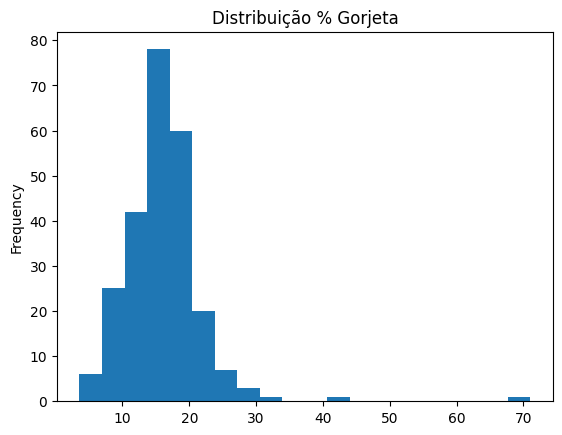

In [ ]:
gorjeta["gorjeta/conta"].plot.hist(bins=20, title="Distribuição % Gorjeta")